In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from functools import reduce
from linearmodels.panel import PanelOLS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import itertools 
from decimal import Decimal
from scipy.stats import percentileofscore
import glob

In [4]:
#import functions from functions.py
import sys
sys.path.append('../')  # go up one level to the parent directory
from function_definitions import *

## Build the cyber risk measure from the saved paragraph scores

In [28]:
paragraph_score_path = '../../data/cyber_risk_measures/doc2vec/per_paragraph/general/{}/*'
years = np.arange(2008,2023)

document_scores = []
document_scores_mean = []

#compute the cybersecurity risk measure
for year in years:
    files = glob.glob(paragraph_score_path.format(year))
    tickers = []
    doc_scores = {}
    doc_scores_mean= {}
    for file in tqdm(files, desc = f'Computing cyber-risk measure for {year}', leave = False):
        ticker = re.findall('\d/(.*)_sim_matrix.csv.gz', file)[0]
        try:
            pscores = pd.read_csv(file).values
        except:
            continue
        
        if not len(pscores):
            continue

        #compute the scores (= mean score above 99th percentile of scores of the paragraphs)
        max_ = np.max(pscores, axis = 1) #consider the maximum similarity for each paragraph
        doc_scores[ticker] = np.mean(max_[max_>= np.percentile(max_, 99)])
        doc_scores_mean[ticker] = np.mean(max_)
        #get a score for each type of cybersecurity event
        
    document_scores.append(doc_scores)
    document_scores_mean.append(doc_scores_mean)

#save general cybersecurity scores
general_cybersec = pd.DataFrame(document_scores, index = years)

document_scores_mean_df = pd.DataFrame(document_scores_mean, index = years)

clear_output()
print('Done')

Done


In [30]:
general_cybersec

,BARI,FNLC,ETC,MSN,LUV,HUBG,GTAX,SYMM,MANT,CLEV,...,BIOS,AMCI,TLGA,CTKB,BOAS,LFST,CYN,PL,GLBL,DNAD
2008,0.494729,0.512075,0.49780,0.505220,0.510667,0.529125,0.496180,0.573200,0.539383,0.50200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.506575,0.509940,0.51120,0.506925,0.495843,0.530375,0.505800,0.584917,0.536650,0.50200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.506700,0.504633,0.53065,0.504525,0.516088,0.532600,0.499250,0.569800,0.541817,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.496425,0.525050,0.51950,0.500800,0.515357,0.533067,0.501740,0.562280,0.561650,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,0.528686,0.53635,0.536167,0.512430,0.543775,0.498033,0.573100,0.556250,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,0.515657,NaN,0.518250,0.526460,0.558025,0.490233,0.574500,0.565583,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,0.506614,NaN,0.506820,0.520630,0.550925,NaN,NaN,0.557567,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,0.535214,NaN,0.510525,0.517111,0.549450,NaN,NaN,0.564550,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,0.534429,NaN,0.540575,0.515933,0.534875,NaN,NaN,0.579660,0.48460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,0.538129,NaN,0.539500,0.520067,0.551800,NaN,NaN,0.572900,0.53750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
cyber_measures_path = '../../data/cyber_risk_measures/doc2vec/'
actual_cybersec = pd.read_csv(cyber_measures_path+'general_cybersec_scores.csv.gz', index_col = 0)
actual_cybersec[general_cybersec.columns]

,BARI,FNLC,ETC,MSN,LUV,HUBG,GTAX,SYMM,MANT,CLEV,...,BIOS,AMCI,TLGA,CTKB,BOAS,LFST,CYN,PL,GLBL,DNAD
2008,0.494724,0.512158,0.497924,0.505119,0.510644,0.529029,0.496251,0.573097,0.539456,0.501857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.506552,0.510000,0.511211,0.506949,0.495893,0.530323,0.505798,0.584866,0.536536,0.501857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.506640,0.504687,0.530521,0.504512,0.516026,0.532559,0.499332,0.569841,0.541875,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.496385,0.525027,0.519540,0.500814,0.515245,0.533113,0.501787,0.562372,0.561581,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,0.528645,0.536384,0.536129,0.512440,0.543767,0.498084,0.573213,0.556220,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,0.515665,NaN,0.520547,0.526488,0.557871,0.490275,0.574571,0.565371,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,0.506566,NaN,0.506790,0.520671,0.550865,NaN,NaN,0.557389,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,0.535231,NaN,0.510537,0.517091,0.549482,NaN,NaN,0.564479,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,0.534454,NaN,0.540650,0.515866,0.534876,NaN,NaN,0.579774,0.484584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,0.538154,NaN,0.539538,0.520002,0.551878,NaN,NaN,0.572909,0.537486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis of the cybersecurity risk measures

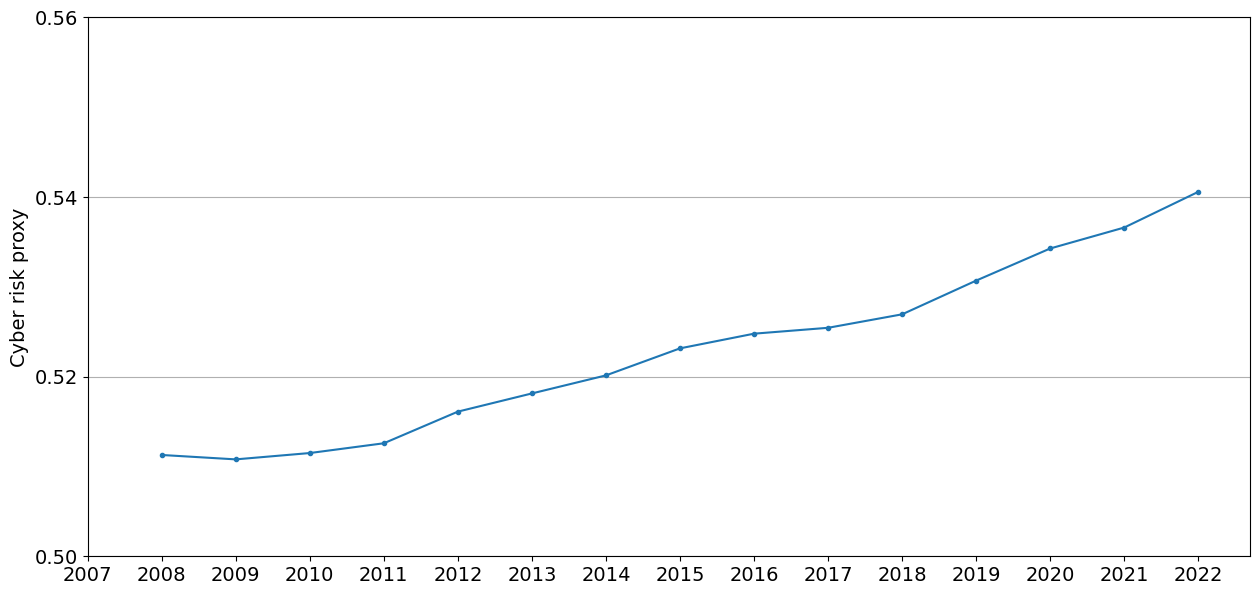

In [32]:
#plot the average of the cyber risk measure
ax = general_cybersec.mean(1).plot(style = '.-',figsize = (15,7), yticks = np.arange(0.50,0.58,0.02),
                                   xticks = np.arange(2007,2023)).grid(axis = 'y')

plt.ylabel('Cyber risk proxy', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Univariate portfolio sorts

### General Cyber risk 

In [35]:
#read in the necessary files (firm characteristics)
read_path = '../../data/returns/'

returns = pd.read_csv(read_path+'monthly_returns.csv.gz', index_col = 'date')
mkt_caps = pd.read_csv(read_path+'monthly_mkt_caps.csv.gz', index_col = 'date')
#read in the previously saved stocknames file
stocknames = pd.read_csv("../../data/stocknames.csv.gz", na_filter = False)
stocknames.replace('', np.nan, inplace = True)
stocknames.FF_Industry_code = stocknames.FF_Industry_code.astype(float)
#long-term cyber risk score
long_term_cybersec = general_cybersec.expanding().mean()
long_term_cybersec[general_cybersec.isnull()] = np.nan

returns.index = pd.to_datetime(returns.index)
mkt_caps.index = pd.to_datetime(mkt_caps.index)

#Factor returns
FF5 = pd.read_csv('../../data/FF_factors/FF5.csv',skiprows = 3, index_col = 0)[:714].astype(float)
FF5 = FF5/100 # in percent?????
FF5.index.rename('date', inplace = True)
FF5.index = pd.to_datetime(FF5.index, format = '%Y%m')
momentum = pd.read_csv('../../data/FF_factors/Momentum.csv',skiprows = 13, index_col = 0)[:1153].astype(float)
momentum = momentum/100 # in percent?????
momentum.index.rename('date', inplace = True)
momentum.index = pd.to_datetime(momentum.index, format = '%Y%m')
momentum.columns = ['UMD']
FF5 = FF5.merge(momentum,left_index = True,right_index = True)

In [36]:
dates = pd.date_range(start = '01-01-2009', end = '12-01-2022', freq = 'MS', inclusive = 'left')
quarters = dates[::3]
nb_firms = []
mkt_values = []
book_to_markets = []
ROAs = []
risk_index_quintiles = []

#drop firms with less than 3 years (table 7 caption)
general_cybersec = general_cybersec.loc[:,(~general_cybersec.isnull()).sum()>3]

ew_ret = {}
vw_ret = {}
for i,month in enumerate(dates):
    #update every quarter
    if(month in quarters):
        #Cyber scores for the year
        Cybersec = general_cybersec.loc[month.year,:].dropna()
        #drop firms with no mkt cap the previous month or no ret the next 4 months
        mkt_caps_ = mkt_caps.loc[dates[i-1],Cybersec.index].dropna()
        Cybersec = Cybersec.loc[mkt_caps_.index]
        try:
            firms_with_ret = returns.loc[month:dates[i+4]].dropna(axis = 1,how = 'any').columns
        except:
            firms_with_ret = returns.loc[month:dates[i+1]].dropna(axis = 1,how = 'any').columns
        mkt_caps_ = mkt_caps_[mkt_caps_.index.isin(firms_with_ret)]
        Cybersec = Cybersec[Cybersec.index.isin(firms_with_ret)]

        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[Cybersec.index.values]
        fd[fd_col] = pd.to_datetime(fd[fd_col])

        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        Cybersec.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        Cybersec.dropna(inplace = True)
        mkt_caps_ = mkt_caps_.loc[mkt_caps_.index.isin(Cybersec.index)]

        #sort firms into quintiles
        quintiles = pd.qcut(Cybersec, q = 5, labels = False)

        quantile_weights = []
        for q in range(5):
            firms = quintiles[quintiles == q].index
            quantile_weights.append(mkt_caps_.loc[firms].div(mkt_caps_.loc[firms].sum()))
            nb_firms.append(len(firms))
    
    ew_ret[month] = []
    vw_ret[month] = []
    for q in range(5):
        firms = quintiles[quintiles == q].index
        quantile_ret = returns.loc[month, firms]
        #equally weighted portfolios
        ew_ret[month].append(quantile_ret.mean())
        #value weighted portfolios
        vw_ret[month].append(quantile_ret.multiply(quantile_weights[q]).sum())
        
        #get current risk index of the portfolio
        cyber = general_cybersec.loc[month.year,firms]
        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[firms]
        fd[fd_col] = pd.to_datetime(fd[fd_col])
        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        cyber.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        risk_index_quintiles.append(cyber.multiply(quantile_weights[q]).sum())

idx = ['quintile_'+str(i) for i in range(5)]
ew_ret = pd.DataFrame(ew_ret, index = idx).T
vw_ret = pd.DataFrame(vw_ret, index = idx).T
risk_index_quintiles = np.reshape(risk_index_quintiles,(-1,5))
nb_firms = np.reshape(nb_firms,(-1,5))

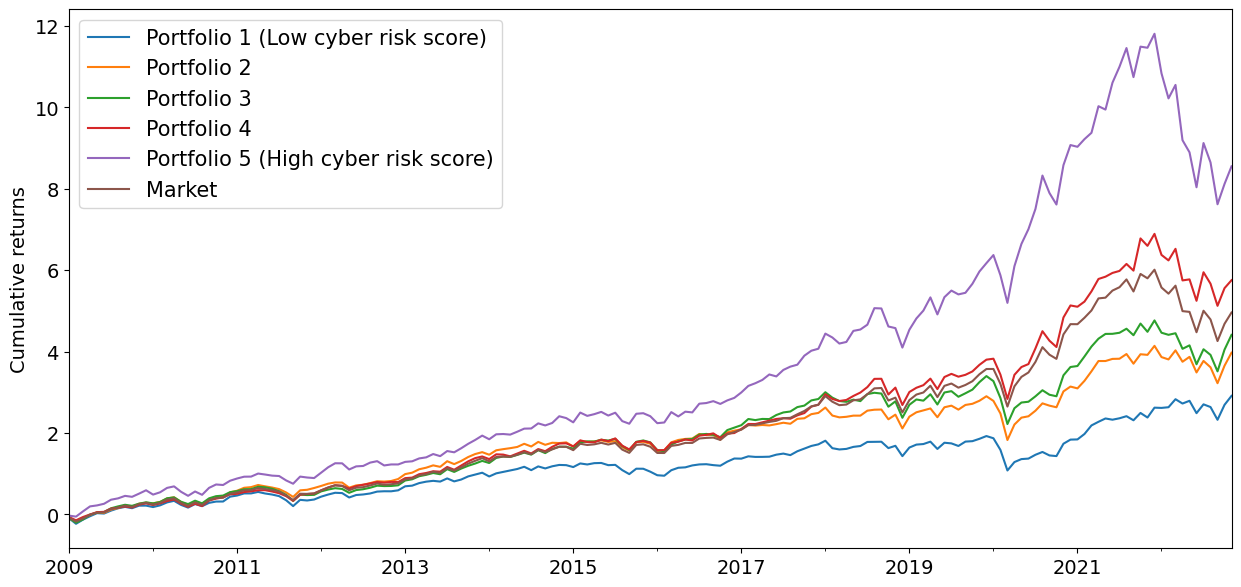

In [37]:
#plot the cumulative return of the quintile portfolios and the market portfolio
Mkt = FF5['Mkt-RF'].add(FF5['RF'])
Mkt.name = 'Mkt'
temp = pd.concat([vw_ret, Mkt[Mkt.index.isin(vw_ret.index)]], axis = 1)
#temp['LS'] = temp.quintile_4.sub(temp.quintile_0)
((temp+1).cumprod()-1).plot(figsize = (15,7)) #, style = ['-',':','--','-.','--.','-x']
#plt.title('Cumulative Returns', fontsize = 18)
plt.legend(['Portfolio 1 (Low cyber risk score)', 'Portfolio 2', 'Portfolio 3',
            'Portfolio 4', 'Portfolio 5 (High cyber risk score)',
            'Market'], fontsize = 15)#,'Long Short Portfolio (H-L)'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Cumulative returns', fontsize = 14)
plt.show()

In [38]:
#value weighted excess returns and alphas
table, pval_table, t_stat_table, Ratio_table = get_alphas(vw_ret, FF5)
print('Value weighted portfolios')
display(table.style.format("{:.2%}"))
print('p-values:')
display(pval_table.style.format("{:.3f}"))
print('t stats:')
display(t_stat_table.style.format("{:.3f}"))
print('Annualized ratios:')
display(Ratio_table.style.format("{:.4}"))

Value weighted portfolios


,Q1 (low),Q2,Q3,Q4,Q5 (high),Q5-Q1
Excess return,0.89%,1.03%,1.09%,1.22%,1.43%,0.54%
CAPM alpha,-0.21%,-0.08%,-0.07%,0.08%,0.31%,0.51%
FFC alpha,-0.12%,-0.02%,0.00%,0.06%,0.24%,0.35%
FF5 alpha,-0.15%,-0.07%,-0.00%,0.06%,0.24%,0.39%


p-values:


,Q1 (low),Q2,Q3,Q4,Q5 (high),Q5-Q1
Excess return,0.001,0.000,0.000,0.000,0.000,0.093
CAPM alpha,0.385,0.589,0.595,0.131,0.114,0.205
FFC alpha,0.307,0.796,0.949,0.381,0.058,0.075
FF5 alpha,0.132,0.440,0.973,0.422,0.063,0.029


t stats:


,Q1 (low),Q2,Q3,Q4,Q5 (high),Q5-Q1
Excess return,3.239,3.782,3.753,4.688,4.167,1.677
CAPM alpha,-0.868,-0.541,-0.532,1.509,1.581,1.268
FFC alpha,-1.021,-0.258,0.064,0.877,1.894,1.782
FF5 alpha,-1.505,-0.772,-0.034,0.803,1.860,2.177


Annualized ratios:


,Q1 (low),Q2,Q3,Q4,Q5 (high),Q5-Q1
Annualized Sharpe Ratio,0.649,0.7683,0.7854,0.9025,1.033,0.6118
Annualized Treynor Ratio,0.03204,0.03658,0.03719,0.04233,0.05023,2.285
Annualized Sortino Ratio,0.963,1.187,1.224,1.479,1.783,2.704


In [39]:
#characteristics of the portfolios
tableB = pd.DataFrame(np.ones([2,5]), index = ['Number of firms', 'Cyber risk index'],
                      columns = ['Q1 (low)', 'Q2', 'Q3', 'Q4', 'Q5 (high)'])
tableB.loc['Number of firms',:] = np.mean(nb_firms, axis = 0)
tableB.loc['Cyber risk index',:] = np.mean(risk_index_quintiles, axis = 0)

tableB.style.format("{:.3f}")

,Q1 (low),Q2,Q3,Q4,Q5 (high)
Number of firms,615.804,615.089,615.089,615.107,615.429
Cyber risk index,0.492,0.507,0.518,0.532,0.572
